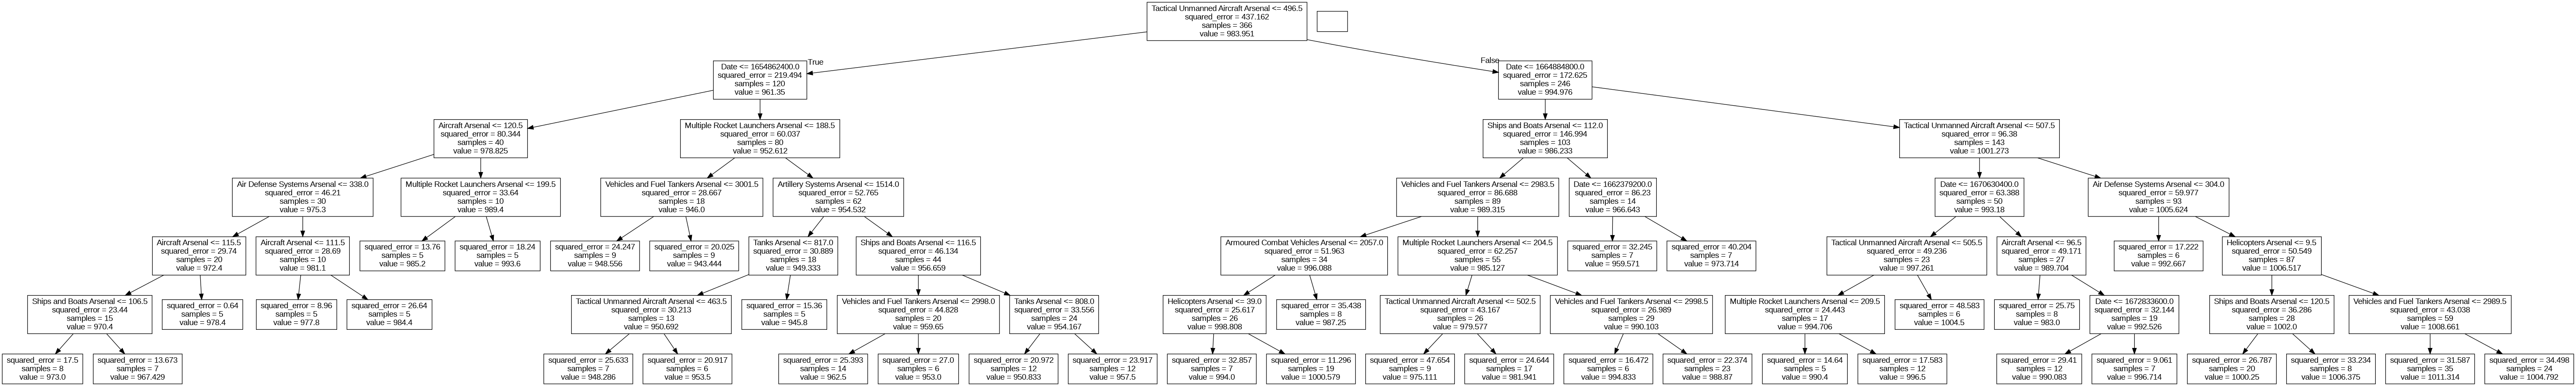

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
import requests
from io import BytesIO

# Download the Excel file from the URL
url = "https://github.com/manoelgadi/IE_MIM_PA/raw/refs/heads/main/war_timeseries_dataset.xlsx"
response = requests.get(url)
excel_file = BytesIO(response.content)

# Load the dataset from the 'data' sheet of the Excel file
try:
    data = pd.read_excel(excel_file, sheet_name="data")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit()

# Convert datetime columns to numeric (timestamp)
for col in data.columns:
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        data[col] = pd.to_datetime(data[col]).astype('int64') // 10**9  # Convert to seconds

# The last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Create and train the Decision Tree Regressor (using all data)
clf_regressor = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)
clf_regressor.fit(X, y)

# Export the decision tree to a DOT format
dot_data = StringIO()
export_graphviz(clf_regressor, out_file=dot_data, feature_names=X.columns)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png("tree_all_data.png")

# Display the image
Image(filename='tree_all_data.png')



In [28]:
# Make predictions on the test set
y_pred = clf_regressor.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9428359903951253
